In [6]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import pylab as pl
import numpy as np

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [7]:
img_rows, img_cols = 28, 28
ndim = np.prod(x_train[0].shape)

In [8]:
x_train.max(), x_train.min()

(255, 0)

In [9]:
x_train = (x_train.astype(float) / 255).reshape(len(x_train), ndim)
x_test = (x_test.astype(float) / 255).reshape(len(x_test), ndim)

Regressione: loss --> mean squared error; linear activation nell'output layer

Epoch 1/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0187 - val_loss: 0.0062
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0061 - val_loss: 0.0052
Epoch 3/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0053 - val_loss: 0.0048
Epoch 4/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 5/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 6/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 7/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 8/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 9/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 10/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0041 - val_loss: 0.0040

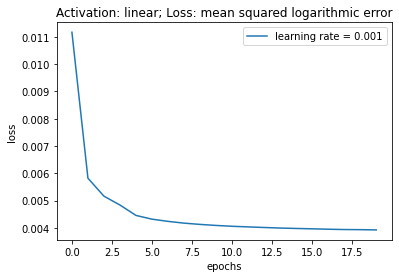

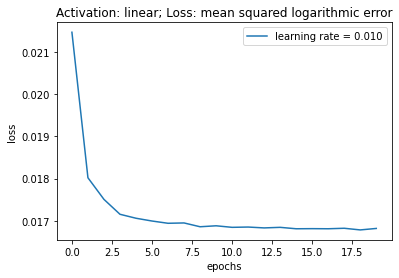

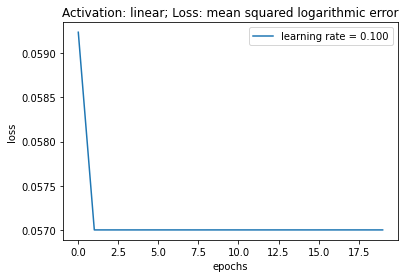

In [13]:
model_digits64 = Sequential()
model_digits64.add(Dense(units = 128, activation = 'relu', input_dim = ndim))
model_digits64.add(Dense(units = 64, activation = 'relu'))
model_digits64.add(Dense(units = 128, activation = 'relu'))
model_digits64.add(Dense(ndim, activation='linear'))
lr = 1e-3
for i in range(3):
  model_digits64.compile(keras.optimizers.Adam(lr), loss = 'mean_squared_logarithmic_error')
  history64 = model_digits64.fit(x_train, x_train, 
                               validation_data=(x_test, x_test),
                               epochs=20, batch_size=100, verbose=1)
  pl.figure()
  pl.plot(np.array(history64.history['loss']), label="learning rate = %.3f"%lr)
  pl.ylabel('loss')
  pl.xlabel('epochs')
  pl.legend()
  pl.title("Activation: linear; Loss: mean squared logarithmic error")
  lr = lr * 10

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.2475 - val_loss: 0.1125
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.1083 - val_loss: 0.0955
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0952 - val_loss: 0.0897
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0898 - val_loss: 0.0860
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0861 - val_loss: 0.0837
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0839 - val_loss: 0.0817
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0823 - val_loss: 0.0804
Epoch 8/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0808 - val_loss: 0.0792
Epoch 9/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0797 - val_loss: 0.0783
Epoch 10/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0788 - val_loss: 0.0774

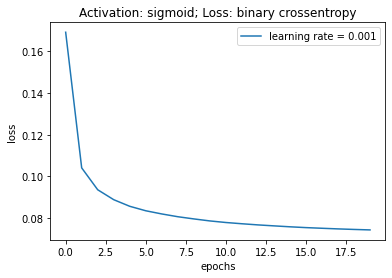

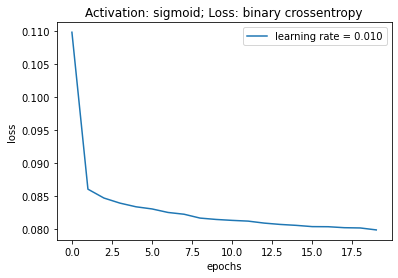

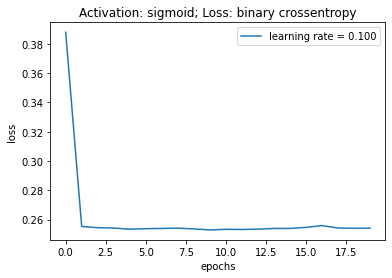

In [14]:
model_digits64 = Sequential()
model_digits64.add(Dense(units = 128, activation = 'relu', input_dim = ndim))
model_digits64.add(Dense(units = 64, activation = 'relu'))
model_digits64.add(Dense(units = 128, activation = 'relu'))
model_digits64.add(Dense(ndim, activation='sigmoid'))
lr = 1e-3
for i in range(3):
  model_digits64.compile(keras.optimizers.Adam(lr), loss = 'binary_crossentropy')
  history64 = model_digits64.fit(x_train, x_train, 
                               validation_data=(x_test, x_test),
                               epochs=20, batch_size=100, verbose=1)
  pl.figure()
  pl.plot(np.array(history64.history['loss']), label="learning rate = %.3f"%lr)
  pl.ylabel('loss')
  pl.xlabel('epochs')
  pl.legend()
  pl.title("Activation: sigmoid; Loss: binary crossentropy")
  lr = lr * 10

Epoch 1/20
300/300 [==============================] - 4s 13ms/step - loss: 0.0244 - val_loss: 0.0078
Epoch 2/20
300/300 [==============================] - 4s 12ms/step - loss: 0.0075 - val_loss: 0.0065
Epoch 3/20
300/300 [==============================] - 3s 11ms/step - loss: 0.0065 - val_loss: 0.0060
Epoch 4/20
300/300 [==============================] - 4s 12ms/step - loss: 0.0060 - val_loss: 0.0057
Epoch 5/20
300/300 [==============================] - 4s 12ms/step - loss: 0.0058 - val_loss: 0.0055
Epoch 6/20
300/300 [==============================] - 4s 12ms/step - loss: 0.0056 - val_loss: 0.0054
Epoch 7/20
300/300 [==============================] - 4s 12ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 8/20
300/300 [==============================] - 4s 12ms/step - loss: 0.0053 - val_loss: 0.0051
Epoch 9/20
300/300 [==============================] - 4s 12ms/step - loss: 0.0052 - val_loss: 0.0051
Epoch 10/20
300/300 [==============================] - 3s 12ms/step - loss: 0.0051 - val_lo

Text(0.5, 1.0, 'Activation: sigmoid; Loss: binary crossentropy')

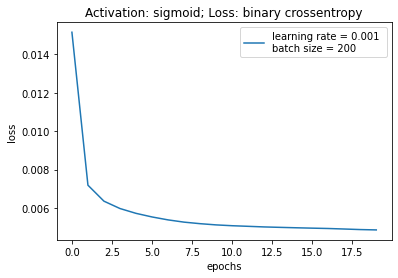

In [21]:
model_digits64 = Sequential()
model_digits64.add(Dense(units = 128, activation = 'relu', input_dim = ndim))
model_digits64.add(Dense(units = 64, activation = 'relu'))
model_digits64.add(Dense(units = 128, activation = 'relu'))
model_digits64.add(Dense(ndim, activation='linear'))
lr = 1e-3
model_digits64.compile(keras.optimizers.Adam(lr), loss = 'mean_squared_logarithmic_error')
history64 = model_digits64.fit(x_train, x_train, 
                               validation_data=(x_test, x_test),
                               epochs=20, batch_size=200, verbose=1)
pl.figure()
pl.plot(np.array(history64.history['loss']), label="learning rate = %.3f \nbatch size = 200"%lr)
pl.ylabel('loss')
pl.xlabel('epochs')
pl.legend()
pl.title("Activation: sigmoid; Loss: binary crossentropy")